# Basic Data Analysis and Visualization 

Rebekah Esmaili (rebekah.esmaili@noaa.gov)
Research Scientist, STC/JPSS
 
---


## Why Python?

Pros

* General-purpose, cross-platform
* Free and open source
* Reasonably easy to learn
* Expressive and succinct code, forces good style
* Being interpreted and dynamically typed makes it great for data analysis
* Robust ecosystem of scientific libraries, including powerful statistical and visualization packages
* Large community of scientific users and large existing codebases
* Major investment into Python ecosystem by Earth science research agencies, including NASA, NCAR, UK Met Office, and Lamont-Doherty Earth Observatory. See Pangeo.
* Reads Earth science data formats like HDF, NetCDF, GRIB

Cons

* Performance penalties for interpreted languages, although many libraries are wrappers for compiled languages. Avoid large loops in favor of matrix/vector operations when possible.
* Multithreading is limited due to the Global Interpreter Lock, but other parallelism is available
* See Julia for a modern scientific language which is trying to overcome these challenges

Why we use Python 3?

* Python 2 reached it's "end of life" as of January 2020
* No more updates or bugfixes
* No further official support
* Subtle differences: https://www.geeksforgeeks.org/important-differences-between-python-2-x-and-python-3-x-with-examples/

---

## Day 1 Objectives
* You will not learn how to code in Python (but the library has some good books!), but we'll learn a little "on the job" today.
* You will learn to:
    * Import relevant packages for scientific programming
    * Read ascii data
    * Basic plotting and visualization
   
---

## What do I need?
* If you are really new to Python, I recommend using the binder links to run these notebooks remotely.
* If you have some experience, you can either install Anaconda locally on your laptop or on a remote server. I _do not recommend_ using system or shared Python installations unless you are advanced!

## What is Anaconda?
* Anaconda is a package manager
* Comes bundled with Python, a lot of useful scientific/mathematical packages, and development environments.
* Easiest place to start if you are new!

## Launching Jupyter Notebook

Linux/Mac
* Open terminal, cd to the directory where you have your notebooks and data, and type:
```
jupyter notebook
```

Windows
* Start → Anaconda3 → Jupyter Notebook

Jupyter Home Screen

* This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in.
* Note: in all the examples, the path assumed that jupyter is launched from the notebook directory. You will need to change the path to point to your data if this is different.
* Click on New on the top right.

---

## Basic Python Syntax

The most basic Python command is to write words to the screen. In jupyter notebooks, the result will appear below the line of code. To run the above command in Jupyter notebook, highlight the cell and either chick the run button (►) or press the **Shift** and **Enter** keys

In [2]:
# This is a comment, python will not run this!
print("Hello Earth")

Hello Earth


In Python, variables are dynamically allocated, which means that you do not need to declare the type or size prior to storing data in them. Instead, Python will automatically guess the variable type based on the content of what you are assigning:

In [11]:
var_int = 8
var_float = 15.0
var_scifloat = 4e8
var_complex = complex(4, 2)
var_greetings = 'Hello Earth'

Python has many built in functions, the syntax is usually:

```
function_name(inputs)
```
We have already used two functions: *print()* and *complex()*. Another useful function is *type()*, will tell us if the variable is an integer, a float, a complex number, or a string. 

In [12]:
 type(var_int),  type(var_float), type(var_scifloat), type(var_complex), type(var_greetings)

(int, float, float, complex, str)

Python has the following built-in operators:

* Addition, subtraction, multiplication, division: +, -, *, /
* Exponential, integer division, modulus: \**, //, %



In [13]:
2+2.0, var_int**2, var_float//var_int, var_float%var_int

(4.0, 64, 1.0, 7.0)

---

**Exercise 1:** Learning to use notebooks

1. Launch Jupyter Notebook and create a new notebook
2. Rename the notebook
3. Create a new cell and use *type()* to see if the following are floats and integers:
    * 2+2
    * 2\*2.0
    * var_float/var_int
---
**Solution:**

## Working with lists

Lists are useful for storing scientific data. Lists are made using square brackets. They can hold any data type (integers, floats, and strings) and even mixtures of the two.

In [24]:
numbers_list = [4, 8, 15, 16, 23]

You can access elements of the list using the index. Python is zero based, so 0 accesses the first element.

In [20]:
numbers_list[3]

16

New items can also be appended to the list using the append function, which has the syntax:

```
variable.function(element(s))
```
The list will be updated *in-place*.

In [25]:
numbers_list.append(42)
print(numbers_list)

[4, 8, 15, 16, 23, 42]


Perhaps we want to calculate the sum of the values in two lists. However, we cannot use the *+* like we did with single values. For list objects, the + will *combine* lists.

In [28]:
numbers_list

[4, 8, 15, 16, 23, 42]

To perform mathematical operations, you can convert the above list to an array using the Numpy package.

### Importing Packages

Packages are collection of modules, which help simplify common tasks. [NumPy](https://numpy.org/) is useful for mathematical operations and array manipulation.


* Provides a high-performance multidimensional array object and tools for working with these arrays.
fundamental package for scientific computing with Python
* Mostly comes with anaconda installation
* For more examples than presented below, please refer https://numpy.org/devdocs/user/quickstart.html

The basic syntax for calling packages is to type the import \[package name\]. However, some packages have long names, so you can use import \[package name\] as \[alias\].

In [29]:
import numpy as np

If you do not see any error after running the line above, then the package was successfully imported.
### Working with arrays

I can use NumPy’s array constructor *np.array()*, I can convert our list to a NumPy array and perform the matrix multiplication. For example, I can double each element of the array:

In [31]:
numbers_list

[4, 8, 15, 16, 23, 42]

In [30]:
numbers_array = np.array(numbers_list)
numbers_array*2

array([ 8, 16, 30, 32, 46, 84])

Another difference between arrays and lists is that list are only one-dimensional. NumPy can be any number of dimensions. For example, I can change the dimensions of the data using the *reshape()* function:

In [35]:
numbers_array_2d = numbers_array.reshape(2,3)
numbers_array_2d[0,0]

4

### Reading ASCII data

The Pandas package has a useful function for reading text/ascii data called *read_csv()*. The function name is somewhat a misnomer, as *read_csv* will read any delimited data using the *delim=* keyword argument. Below, you will import the [Pandas](https://pandas.pydata.org/) package and we will read in a dataset. Note that the path below is relative to the current notebook and you may have to change the code if you are running locally on your computer:

```
data/VIIRSNDE_global2020258.v1.0.txt
```

We will look at the Visible Infrared Imaging Radiometer Suite (VIIRS) Active Fire product, a product that classifies if a pixel contains fire with various confidence levels. More information can be found at https://www.ospo.noaa.gov/Products/land/fire.html. We will examine the data on Sept 15, 2020 (day of year 258).

In [36]:
import pandas as pd

The default seperator is a comma (,), however my data also contains space. I use the "\s*" to indicate space following the comma should be ignored. The engine="python" keyword ensures that this will work across different operating systems.

In [52]:
fname = "data/VIIRSNDE_global2020258.v1.0.txt"
fires = pd.read_csv(fname, sep=',\s*', engine='python')

Next, I will inspect the contents within the notebook using the *head()* function, which will return the first five rows of the dataset. Pandas automatically stores data in structures called *DataFrames*. DataFrames are two dimensional (rows and columns) and resemble a spreadsheet. The leftmost column is the row index and is not part of the *fires* dataset. 

In [53]:
fires.head()

,Num,Lon,Lat,Mask,Conf,brt_t13(K),frp(MW),line,sample,YearDay,Time
0,2,29.991129,-29.555208,9,100,338.333923,29.883327,53,NDE,2020258,1
1,2,29.981384,-29.601839,7,17,300.099274,4.842572,60,NDE,2020258,1
2,2,30.085478,-29.868237,8,76,315.574402,10.423400,97,NDE,2020258,1
3,2,30.084040,-29.874882,8,53,310.038391,7.675260,98,NDE,2020258,1
4,2,30.082544,-29.881517,8,51,302.806458,5.290376,99,NDE,2020258,1


In [54]:
fires.columns

Index(['Num', 'Lon', 'Lat', 'Mask', 'Conf', 'brt_t13(K)', 'frp(MW)', 'line',
       'sample', 'YearDay', 'Time'],
      dtype='object')

You can access individual columns of data using the column name. For example, below you can extract the pixel brightness temperature (brt):

In [56]:
fires["brt_t13(K)"]

0        338.333923
1        300.099274
2        315.574402
3        310.038391
4        302.806458
            ...    
56303    305.149933
56304    300.437561
56305    305.149933
56306    307.136230
56307    302.398987
Name: brt_t13(K), Length: 56308, dtype: float64

---

**Exercise 2:** Import an ascii file

1. Import the dataset "20200901_20200930_Monterey.lev15.csv" and save it to a variable called *aeronet*.
2. Print the first few lines using *.head()*
3. Find a column that doesn't have only missing values (-999) and (challenge!) calculate the mean using the following syntax *variable\["column"\].mean()*
---
**Solution:**

In [58]:
fname="data/20200901_20200930_Monterey.lev15.csv"
aeronet = pd.read_csv(fname)

In [59]:
aeronet.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,0.071296,20:53:18,245,245.870347,0.061169,0.167012,0.238173,-999,-999,0.400838,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
1,0.071296,20:58:18,245,245.873819,0.061155,0.168417,0.239952,-999,-999,0.404648,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
2,0.071296,21:03:18,245,245.877292,0.063135,0.173143,0.246827,-999,-999,0.414668,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
3,0.071296,21:08:18,245,245.880764,0.061754,0.170541,0.241485,-999,-999,0.405998,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
4,0.071296,21:18:18,245,245.887708,0.059059,0.163919,0.232041,-999,-999,0.391191,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999


In [65]:
aeronet["AOD_1640nm"].mean()

-1.7637041143410852

### Working with masks and masked arrays

When working with data, sometimes there are numbers I want to remove. For instance, I may want to work with data below a certain threshold. You can subset the data using identity operations:

* less than: <
* less than or equal to: <=
* greater than: >
* greater than or equal to: >=
* equals: ==
* not equals: !=

Their use will return either a True or False statement. For the *fires* dataset, you can find which elements of the array that meet some condition, such as only examining larger fires that have a Fire Radiative Power (FRP) above 50 MW:

In [69]:
masked_nums = (fires['frp(MW)'] > 50)
print(masked_nums)

0        False
1        False
2        False
3        False
4        False
         ...  
56303    False
56304    False
56305    False
56306    False
56307    False
Name: frp(MW), Length: 56308, dtype: bool


Sometimes you may want to filter by two conditions. For example, insteading of filtering the FRP data, you may only want to examine values within a latitude and longitude domain. In Python, I can combine multiple conditions using and (&) and or (|) statements. Below, I extract the data in 5&deg;x5&deg; box arond Monterey, California:

In [70]:
masked_nums = (fires['Lat'] > 35.0) & (fires['Lat'] < 40.0) & (fires['Lon'] > -125.0) & (fires['Lon'] < -120.0)
print(masked_nums)

0        False
1        False
2        False
3        False
4        False
         ...  
56303    False
56304    False
56305    False
56306    False
56307    False
Length: 56308, dtype: bool


The above mask can be used in place of an index. Below, you can create a new variable that takes the FRP using the *fires\['frp(MW)'\]* variable and subsets it with the array of *masked_nums*:

In [73]:
monterey_fires = fires['frp(MW)'][masked_nums]
print(monterey_fires)

16686     7.838871
16688    11.660147
16689    15.899877
16690    17.872414
16691    12.954104
           ...    
55235    22.411970
55236    33.313660
55237    25.284723
55239    43.701473
55240    26.098984
Name: frp(MW), Length: 317, dtype: float64


From this new variable, you can compute the average in this region and compare them to the global average for that day:

In [74]:
monterey_fires.mean(), fires['frp(MW)'].mean()

(91.59595084542588, 49.94695660808411)

You can use the size command to compare the dimensions of original array and the one that filtered out values that were outside of our latitude and longitude bounds. You will notice that these two arrays have different sizes.

In [75]:
monterey_fires.size, fires['frp(MW)'].size

(317, 56308)

In [ ]:
fires['frp(MW)'].size, monterey_fires.size

There are cases where you will want to preserve the size and shape of the original array. For these situations, you can utilize the NumPy *masked array* module. The syntax is *np.ma.array()*, and you will add a keyword argument *mask=*, which is set to the inverse (~) of the *mask_nums*.

In [77]:
monterey_fires_ma = np.ma.array(fires['frp(MW)'], mask=~masked_nums, fill_value=-999)
monterey_fires_ma

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-999.0)

Then, you can calculate the mean values and confirm that they are the same as the previous example:

In [78]:
monterey_fires_ma.mean()

91.59595084542588

However, the key difference will be the size, which retains the shape of the unmasked data:

In [79]:
monterey_fires_ma.size

56308

---
**Exercise 3:** Filtering data

Using the dataset imported in the previous example (*aeronet*):
    
1. Create a mask that filters the "AOD_870nm" column to only include values that are above 0.
2. Create a new variables, *day_of_year*, with the mask applied to aeronet\["Day_of_Year(Fraction)"\].
3. Create a new variables, *aod_870*, with the mask applied to aeronet\["AOD_870nm"\].
4. Compare the mean value of *aeronet\["AOD_870nm"\]* to *aod_870*.
    
---
**Solution**

In [87]:
aeronet_keeps = (aeronet["AOD_870nm"] > 0)
day_of_year = aeronet["Day_of_Year(Fraction)"][aeronet_keeps]
aod_870 = aeronet["AOD_870nm"][aeronet_keeps]

In [88]:
aeronet["AOD_870nm"].mean(), aod_870.mean()

(-0.3344563769379846, 0.6341813957322987)

### Basic figures and plots

Python has several packages to create visuals for remote sensing data, either in the form of imagery or plots of relevant analysis. Of these, the most widely used and oldest packages is [Matplotlib](https://matplotlib.org/). Matplotlib plots are highly customizable and has additional toolkits that can enhance functionality, such as creating maps using the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) package, which I will describe more in the next session.


In [89]:
import matplotlib.pyplot as plt

Suppose you want to learn what the global distribution of fire radiative power is. From inspecting the frp(MW) column earlier, these values extend to many decimal places. Rather than use a continuous scale, I can instead group in the data into 10 MW bins, from 0 to 500 MW:

In [104]:
bins10MW = np.arange(0, 500, 10)

I can use these bins to create a histogram. Line by line, the code below will do as follows. Now, with each additional line, I am layering elements on this empty graphic. The entire block of code must be run at once and not split into multiple cells.  

1. *plt.figure()* creates a blank canvas.
2. I add the histogram to the figure using *plt.hist()*, which automatically will count the number of rows with fire radiative power in the bins that I defined above in the bins10W variable. I must then pass in the data (fires['frp(MW)']) and the bins (bins10MW) into plt.hist. 
3. *plt.show()* tells matplotlib the plot is now complete and to render it:

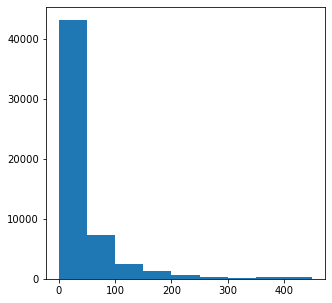

In [101]:
plt.figure(figsize=[5,5])
plt.hist(fires['frp(MW)'], bins=bins10MW)
plt.show()

Below, you will remake this plot but add some aesthetic additions, such as labels to the x and y axis using *set_xlabel()* and *set_ylabel()*. Since there are thousands more fires with fire radiative power less than 100 MW than fires with higher values the data are likely lognormal. The plot will be easier to interpret of I rescale the y-axis to a log scale while leaving the x-axis linear.

The command *plt.subplot()* will return an axis object to a variable (*ax*). There are three numbers passed in (111), which correspond to rows, columns, and index. In this example, there is one row and one column, and therefore, only one index.

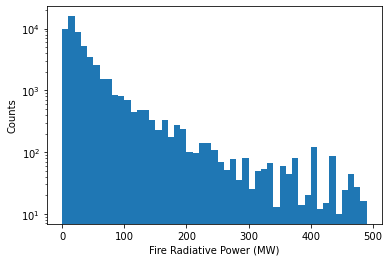

In [110]:
plt.figure()

ax = plt.subplot(111)

ax.hist(fires['frp(MW)'], bins=bins10MW)
ax.set_yscale('log')
ax.set_xlabel("Fire Radiative Power (MW)")
ax.set_ylabel("Counts")

plt.show()

You can also plot the data in 2-dimensions. For example, each row in *fires* has a latitude and longitude coordinates pair. I will take these two coordinates and plot using *plt.scatter()*. The first argument is the x-coordinate and the second is the y-coordinate (the order matters). 

There are some command line options *plt.scatter()*:

* s: size with respect to the default
* c: color, which can be either from a predefined name list or a hexadecimal value
* alpha: opacity, where smaller values are transparent.

Like in the previous example, I have chosen to label the latitude and longitude axes:

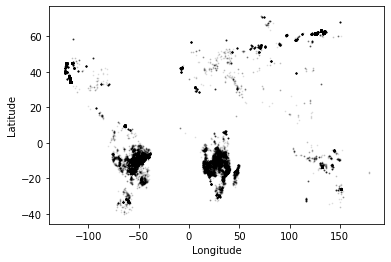

In [112]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(fires['Lon'], fires['Lat'], s=0.5, c='black', alpha=0.1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

You can almost see the outline of the continents from the data above. In the next session, you will learn how to overlay maps onto your plots.

---
**Exercise 4:** Create a scatterplot

Use the variables *aod_870* and *day_of_year* that you made in Exercise 3 to:

1. Create a scatter plot showing the *day_of_year* (x-axis) and *aod_870* (y-axis)
2. Add y-axis and x-axis labels using *.set_xlabel()* and *.set_ylabel()*
3. Adjust the color and size of the scatterplot
---
**Solution**

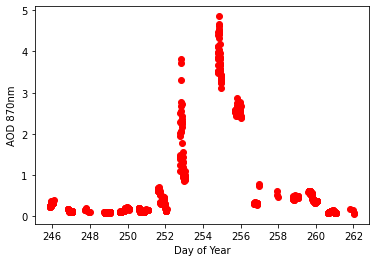

In [116]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(day_of_year, aod_870, c='red')

ax.set_xlabel('Day of Year')
ax.set_ylabel('AOD 870nm')

plt.show()

In [ ]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncol=1)

## Summary:

You learned:
* Very basic built-in Python functions and operations
* How to import three packages: numpy, pandas, and matplotlib
* Worked with arrays and lists
* How to create a simple plot

Next session:
* More advanced plots, such as using maps
* Importing scientific datasets, such as netcdf and grib
* Creating python scripts